# Loan Status Application Prediction:

# Project Description:

This dataset includes details of applicants who have applied for loan. The dataset includes details like credit history, loan amount, their income, dependents etc

Independent Variables:
1.	Loan_ID - This refer to the unique identifier of the applicant's affirmed purchases

2.	Gender - This refers to either of the two main categories (male and female) into which applicants are divided on the basis of their reproductive functions

3.	Married - This refers to applicant being in a state of matrimony

4.	Dependents - This refres to persons who depends on the applicants for survival

5.	Education - This refers to number of years in which applicant received systematic instruction, especially at a school or university

6.	Self_Employed - This refers to applicant working for oneself as a freelancer or the owner of a business rather than for an employer

7.	Applicant Income - This refers to disposable income available for the applicant's use under State law.

8.	CoapplicantIncome - This refers to disposable income available for the people that participate in the loan application process alongside the main applicant use under State law.

9.	Loan_Amount - This refers to the amount of money an applicant owe at any given time.

10.	Loan_Amount_Term - This refers to the duaration in which the loan is availed to the applicant

11.	Credit History - This refers to a record of applicant's ability to repay debts and demonstrated responsibility in repaying them.

12.	Property_Area - This refers to the total area within the boundaries of the property as set out in Schedule.

13.	Loan_Status - This refres to whether applicant is eligible to be availed the Loan requested.

You have to build a model that can predict whether the loan of the applicant will be approved(Loan_status) or not on the basis of the details provided in the dataset. 


In [1]:
#importing the required library
import pandas as pd
import numpy as np
import sklearn
import scipy
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("loan.csv")

In [3]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


As we know from problem Statement our label data is loan_status so we will have to do the Logistic Regression for model Building

In [4]:
df.shape

(614, 13)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [7]:
df=df.drop("Loan_ID",axis=1)

In [8]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


We have dropped the Loan_ID column as it is not much useful for our dataset...

In [9]:
#Finding the missing values in the dataset

In [10]:
df.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

in our dataset there is some columns in which there is missing values so have to treat them...

In [11]:
#let's check the null values in the percentage value for each indivisual column

In [12]:
feature = df.isnull().sum().keys().tolist()
miss_data = df.isnull().sum().values.tolist()
missing_report = pd.DataFrame(list(zip(feature,miss_data)), columns = ["Columns", "Missing Data"], index=range(1,len(feature)+1))
missing_report["Missing %"] = round(((missing_report["Missing Data"]/df.shape[0])*100),2)
missing_report

,Columns,Missing Data,Missing %
1,Gender,13,2.12
2,Married,3,0.49
3,Dependents,15,2.44
4,Education,0,0.00
5,Self_Employed,32,5.21
6,ApplicantIncome,0,0.00
7,CoapplicantIncome,0,0.00
8,LoanAmount,22,3.58
9,Loan_Amount_Term,14,2.28
10,Credit_History,50,8.14


Not having that much missing values that need to drop the column.Lets treat those missing values in the dataset

# bifurcation of the column as per their datatype:

In [13]:
# getting list of object data type column names
object_datatype = []
for x in df.dtypes.index:
    if df.dtypes[x] == 'object':
        object_datatype.append(x)
print(f"Object Data Type Columns are:\n", object_datatype)


# getting the list of float data type column names
number_datatype = []
for x in df.dtypes.index:
    if df.dtypes[x] == 'float64' or df.dtypes[x] == 'int64':
        number_datatype.append(x)
print(f"\nNumber Data Type Columns are:\n", number_datatype)

Object Data Type Columns are:
 ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']

Number Data Type Columns are:
 ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']


In [14]:
#lets seprate the numerical column and categorical column

numerical=df.select_dtypes(include=["float64","int64"]).columns.tolist()
categorical=df.select_dtypes(include=["object"]).columns.tolist()

In [15]:
#Now fill the null vaues in the data

In [16]:
for column in df:
    if df[column].isnull().any():
        if column in categorical:
            df[column]=df[column].fillna(df[column].mode()[0])
        else:
            df[column]=df[column].fillna(df[column].mean())

In [17]:
#lets cross varify for the missing values if it is still present or not

feature = df.isnull().sum().keys().tolist()
miss_data = df.isnull().sum().values.tolist()
missing_data = pd.DataFrame(list(zip(feature, miss_data)), columns = ["Columns", "Missed Data"], index=range(1,len(feature)+1))
missing_data["Missing %"] = round(((missing_data["Missed Data"]/df.shape[0])*100),2)
missing_data

,Columns,Missed Data,Missing %
1,Gender,0,0.0
2,Married,0,0.0
3,Dependents,0,0.0
4,Education,0,0.0
5,Self_Employed,0,0.0
6,ApplicantIncome,0,0.0
7,CoapplicantIncome,0,0.0
8,LoanAmount,0,0.0
9,Loan_Amount_Term,0,0.0
10,Credit_History,0,0.0


So now we can see that missing values has been treated and it is showing the 0% in all the columns

In [18]:
df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

# Great..There is not any missing values......

# Skewness


In [19]:
df.skew()

ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.726601
Loan_Amount_Term    -2.389680
Credit_History      -1.963600
dtype: float64

In [20]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.000000,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.000000,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.000000,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.000000,360.0,1.0,Urban,Y


# Visualaization:

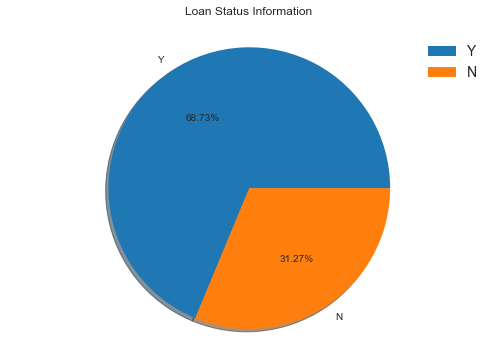

In [21]:
plt.style.use('seaborn-white')
plt.figure(figsize=(7,5))
plt.pie(df['Loan_Status'].value_counts(), labels=df['Loan_Status'].value_counts().index, 
        shadow=True, autopct='%1.2f%%')
plt.title('Loan Status Information\n')
plt.legend(prop={'size':14})
plt.axis('equal')
plt.tight_layout()
plt.show()


The above Pie chart is indicating that in our target column ("Target Status") 68.73% data are yes and rest 31.27% are No so it is showing the Class Imbalanced . Need to treat this 

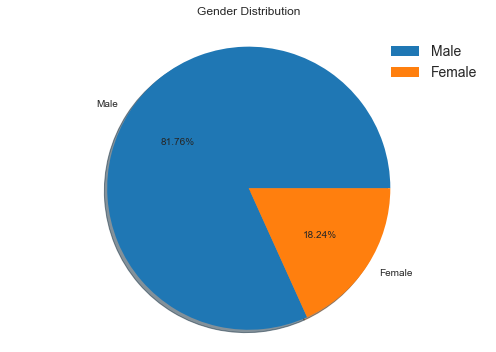

In [22]:
plt.figure(figsize=(7,5))
plt.pie(df['Gender'].value_counts(), labels=df['Gender'].value_counts().index, 
        shadow=True, autopct='%1.2f%%')
plt.title('Gender Distribution\n')
plt.legend(prop={'size':14})
plt.axis('equal')
plt.tight_layout()
plt.show()

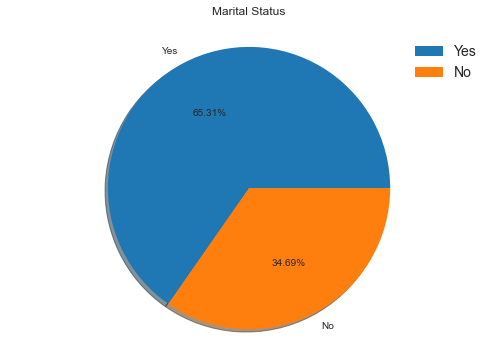

In [23]:
plt.figure(figsize=(7,5))
plt.pie(df['Married'].value_counts(), labels=df['Married'].value_counts().index, 
        shadow=True, autopct='%1.2f%%')
plt.title('Marital Status\n')
plt.legend(prop={'size':14})
plt.axis('equal')
plt.tight_layout()
plt.show()

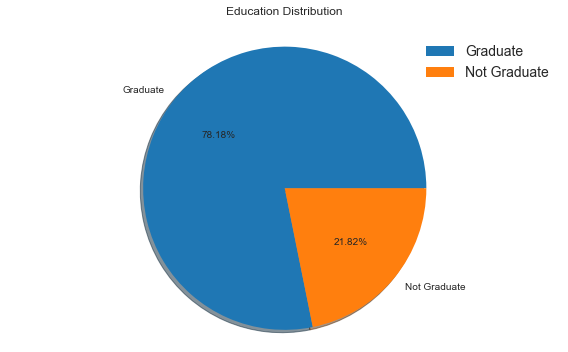

In [24]:
plt.figure(figsize=(8,5))
plt.pie(df['Education'].value_counts(), labels=df['Education'].value_counts().index, 
        shadow=True, autopct='%1.2f%%')
plt.title('Education Distribution\n')
plt.legend(prop={'size':14})
plt.axis('equal')
plt.tight_layout()
plt.show()

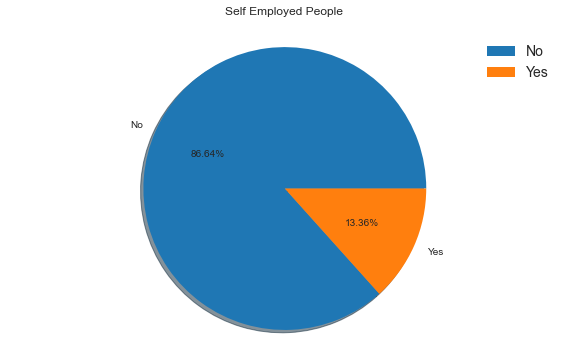

In [25]:
plt.figure(figsize=(8,5))
plt.pie(df['Self_Employed'].value_counts(), labels=df['Self_Employed'].value_counts().index, 
        shadow=True, autopct='%1.2f%%')
plt.title('Self Employed People\n')
plt.legend(prop={'size':14})
plt.axis('equal')
plt.tight_layout()
plt.show()


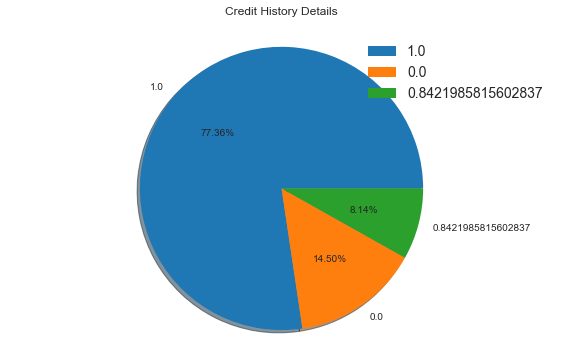

In [26]:
plt.figure(figsize=(8,5))
plt.pie(df['Credit_History'].value_counts(), labels=df['Credit_History'].value_counts().index, 
        shadow=True, autopct='%1.2f%%')
plt.title('Credit History Details\n')
plt.legend(prop={'size':14})
plt.axis('equal')
plt.tight_layout()
plt.show()

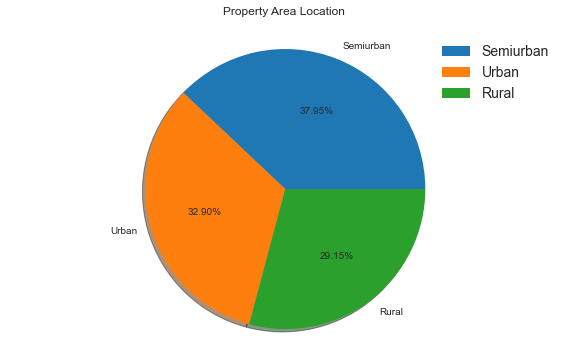

In [27]:
plt.figure(figsize=(8,5))
plt.pie(df['Property_Area'].value_counts(), labels=df['Property_Area'].value_counts().index, 
        shadow=True, autopct='%1.2f%%')
plt.title('Property Area Location\n')
plt.legend(prop={'size':14})
plt.axis('equal')
plt.tight_layout()
plt.show()

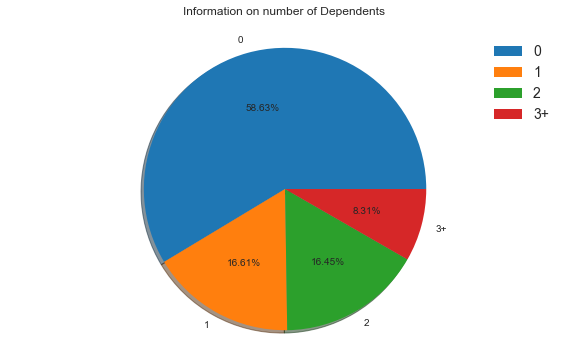

In [28]:
plt.figure(figsize=(8,5))
plt.pie(df['Dependents'].value_counts(), labels=df['Dependents'].value_counts().index, 
        shadow=True, autopct='%1.2f%%')
plt.title('Information on number of Dependents\n')
plt.legend(prop={'size':14})
plt.axis('equal')
plt.tight_layout()
plt.show()

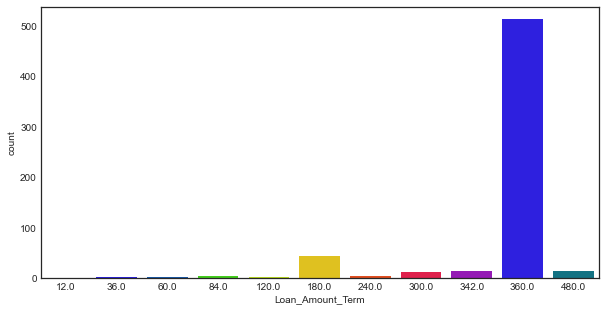

In [29]:
try:
    plt.figure(figsize=(10,5))
    col_name = 'Loan_Amount_Term'
    values = df[col_name].value_counts()
    index = 0
    ax = sns.countplot(df[col_name], palette="prism")
    for i in ax.get_xticklabels():
        ax.text(index, values[i.get_text()]/2, values[i.get_text()], 
                horizontalalignment="center", fontweight='bold', color='w')
        index += 1
    plt.title(f"Count Plot for {col_name}\n")
    plt.ylabel(f"Number of rows")
    plt.xticks(rotation=90)
    plt.show()
    
except Exception as e:
    pass


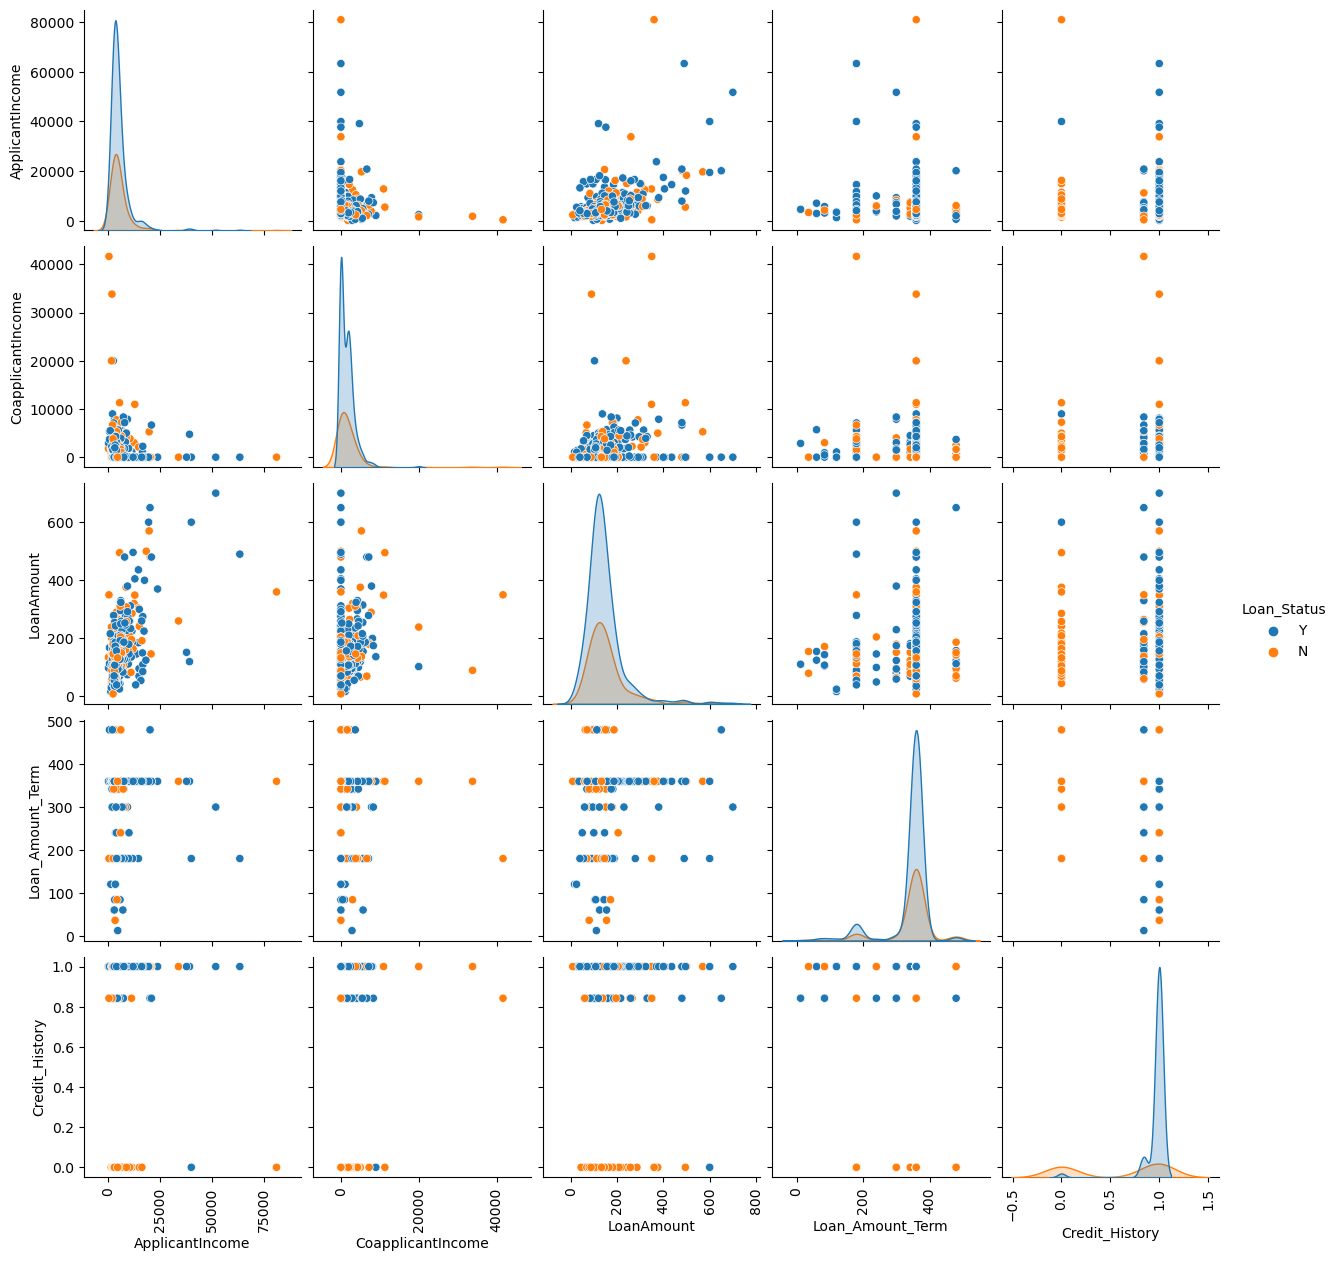

In [30]:
plt.style.use('default')
g = sns.pairplot(df, hue='Loan_Status', diag_kind='kde')
for ax in g.axes.flat:
    ax.tick_params("x", labelrotation=90)
plt.show()


<AxesSubplot:xlabel='LoanAmount', ylabel='Loan_Amount_Term'>

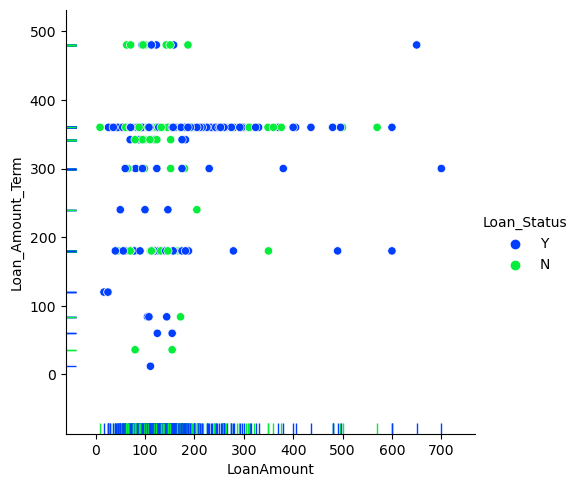

In [31]:
plt.style.use('seaborn-bright')
sns.relplot(data=df, x='LoanAmount', y='Loan_Amount_Term', hue='Loan_Status')
sns.rugplot(data=df, x='LoanAmount', y='Loan_Amount_Term', hue='Loan_Status', legend=False)

<AxesSubplot:xlabel='LoanAmount', ylabel='Loan_Amount_Term'>

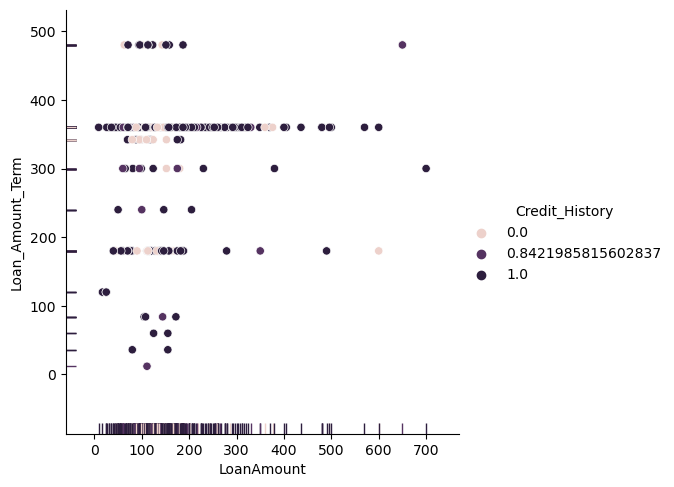

In [32]:
sns.relplot(data=df, x='LoanAmount', y='Loan_Amount_Term', hue='Credit_History')
sns.rugplot(data=df, x='LoanAmount', y='Loan_Amount_Term', hue='Credit_History', legend=False)

<AxesSubplot:xlabel='LoanAmount', ylabel='ApplicantIncome'>

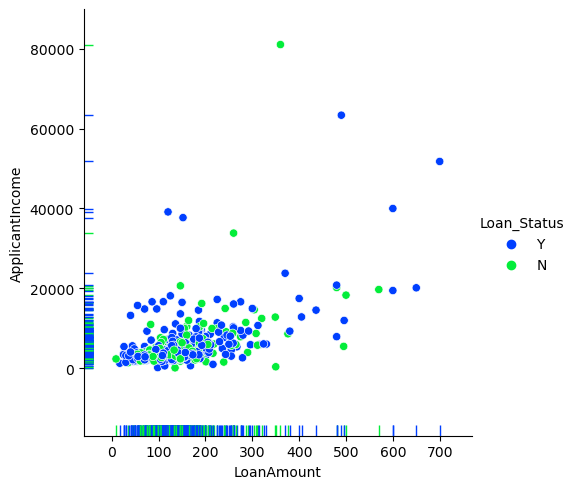

In [33]:
sns.relplot(data=df, x='LoanAmount', y='ApplicantIncome', hue='Loan_Status')
sns.rugplot(data=df, x='LoanAmount', y='ApplicantIncome', hue='Loan_Status', legend=False)

<AxesSubplot:xlabel='LoanAmount', ylabel='ApplicantIncome'>

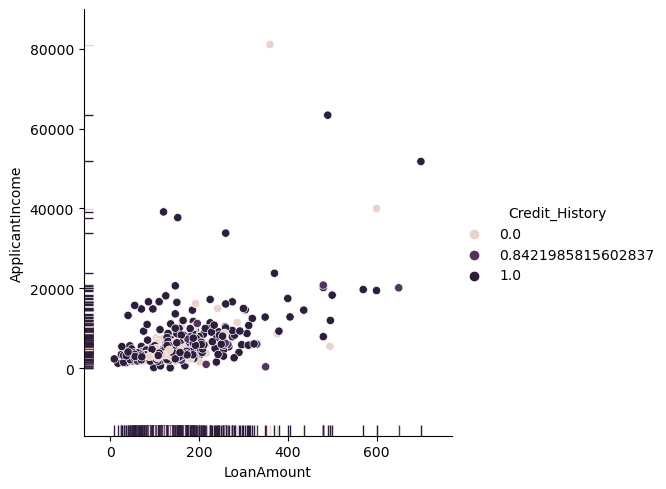

In [34]:
sns.relplot(data=df, x='LoanAmount', y='ApplicantIncome', hue='Credit_History')
sns.rugplot(data=df, x='LoanAmount', y='ApplicantIncome', hue='Credit_History', legend=False)

<AxesSubplot:xlabel='LoanAmount', ylabel='CoapplicantIncome'>

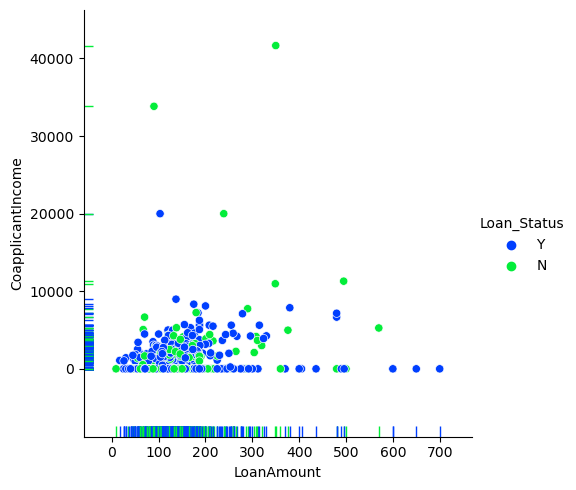

In [35]:
sns.relplot(data=df, x='LoanAmount', y='CoapplicantIncome', hue='Loan_Status')
sns.rugplot(data=df, x='LoanAmount', y='CoapplicantIncome', hue='Loan_Status', legend=False)

<AxesSubplot:xlabel='LoanAmount', ylabel='CoapplicantIncome'>

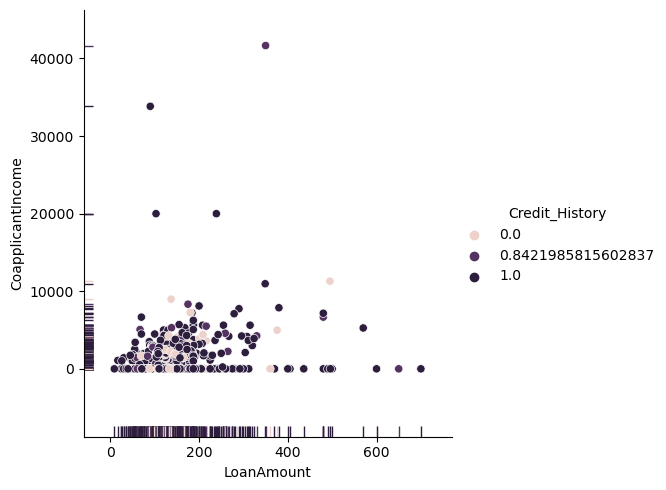

In [36]:
sns.relplot(data=df, x='LoanAmount', y='CoapplicantIncome', hue='Credit_History')
sns.rugplot(data=df, x='LoanAmount', y='CoapplicantIncome', hue='Credit_History', legend=False)

In the above plot we can see that most of the data points are accumulated between 0-10000 for co applicant income and 0-350 for loan amount data and most of these data points have a credit history available for them

In [37]:
from scipy.stats import zscore

from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier


from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

# Encoding the categorical object datatype column:

In [38]:
# Label Encoder

le = LabelEncoder()
df["Loan_Status"] = le.fit_transform(df["Loan_Status"])
df.head()


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,1
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,0
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,1
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,1
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,1


Now our target column Loan status datatype has been change and now it is numerical type

In [39]:
#Ordinal Encoder

oe = OrdinalEncoder()
df['Gender'] = oe.fit_transform(df['Gender'].values.reshape(-1,1))
df['Married'] = oe.fit_transform(df['Married'].values.reshape(-1,1))
df['Dependents'] = oe.fit_transform(df['Dependents'].values.reshape(-1,1))
df['Education'] = oe.fit_transform(df['Education'].values.reshape(-1,1))
df['Self_Employed'] = oe.fit_transform(df['Self_Employed'].values.reshape(-1,1))
df['Property_Area'] = oe.fit_transform(df['Property_Area'].values.reshape(-1,1))
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1.0,0.0,0.0,0.0,0.0,5849,0.0,146.412162,360.0,1.0,2.0,1
1,1.0,1.0,1.0,0.0,0.0,4583,1508.0,128.000000,360.0,1.0,0.0,0
2,1.0,1.0,0.0,0.0,1.0,3000,0.0,66.000000,360.0,1.0,2.0,1
3,1.0,1.0,0.0,1.0,0.0,2583,2358.0,120.000000,360.0,1.0,2.0,1
4,1.0,0.0,0.0,0.0,0.0,6000,0.0,141.000000,360.0,1.0,2.0,1


All the object datatype columns has been converted into numerical column:

# Object datatype and number datatype columns:

In [40]:
print(f"Object Data Type Column Names: \n", object_datatype)
print(f"\nNumeric Data Type Column Names: \n", number_datatype)

Object Data Type Column Names: 
 ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']

Numeric Data Type Column Names: 
 ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']


# Boxplot(outlier Analysis):

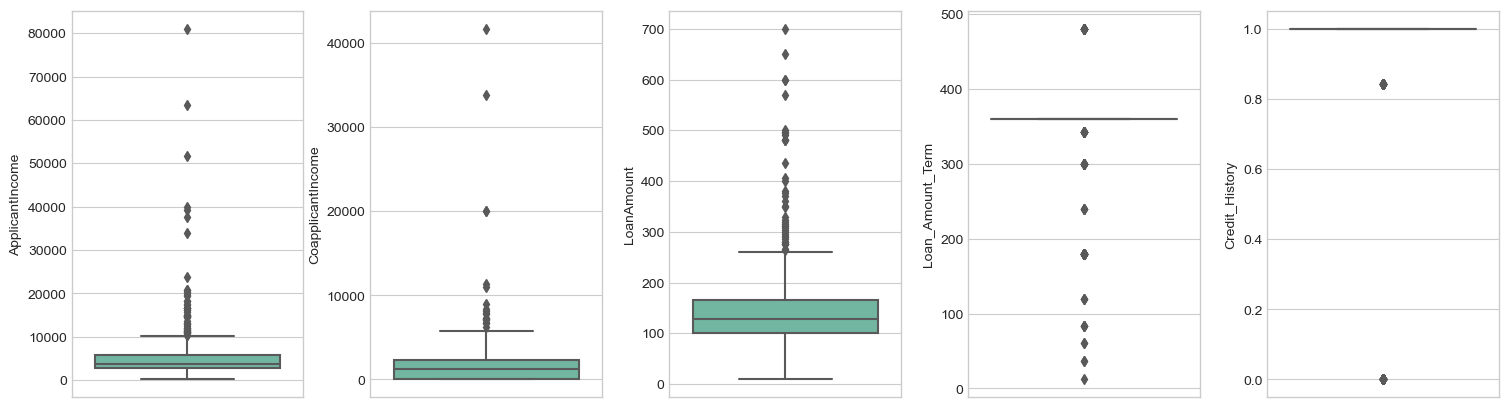

In [41]:
plt.style.use('seaborn-whitegrid')
fig, ax = plt.subplots(ncols=5, nrows=1, figsize=(15,4))
index = 0
ax = ax.flatten()
for col, value in df[number_datatype].items():
    sns.boxplot(y=col, data=df, ax=ax[index], palette="Set2")
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.4, h_pad=1.0)
plt.show()

from the above boxplot graph we can observe that the outliers are present in our numerical data column which need to be treated:

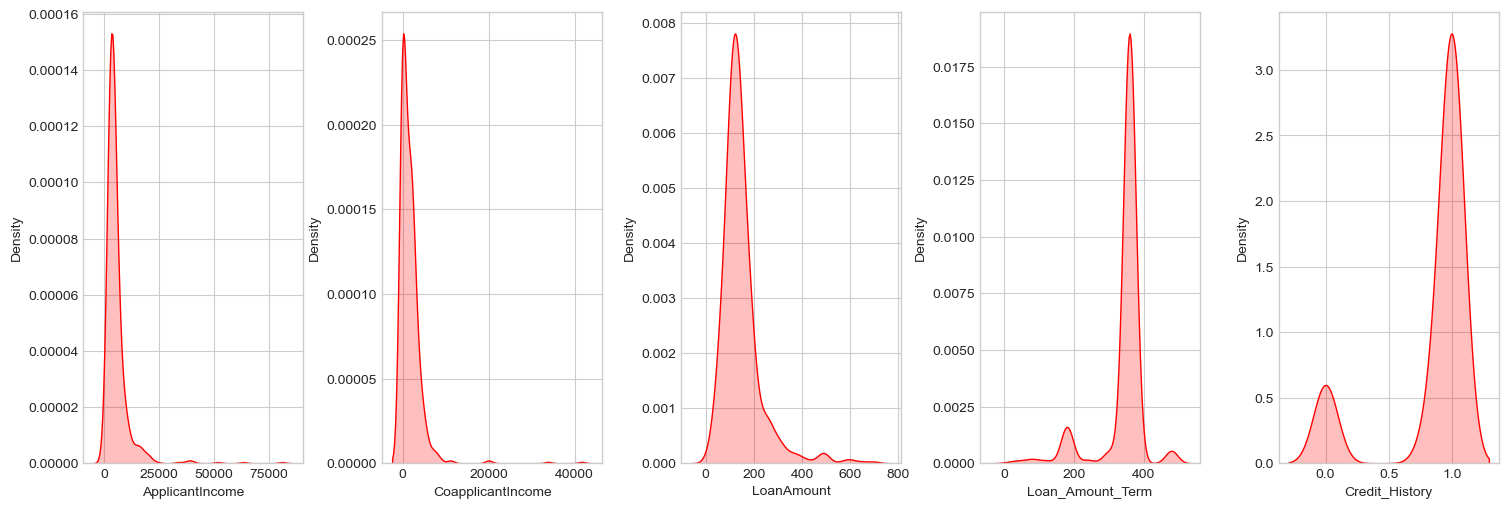

In [42]:
fig, ax = plt.subplots(ncols=5, nrows=1, figsize=(15,5))
index = 0
ax = ax.flatten()
for col, value in df[number_datatype].items():
    sns.distplot(value, ax=ax[index], hist=False, color="r", kde_kws={"shade": True})
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.4, h_pad=1.0)
plt.show()

from above distribution curve we can find out that skewness present in our numerical column data which need to be corrected.

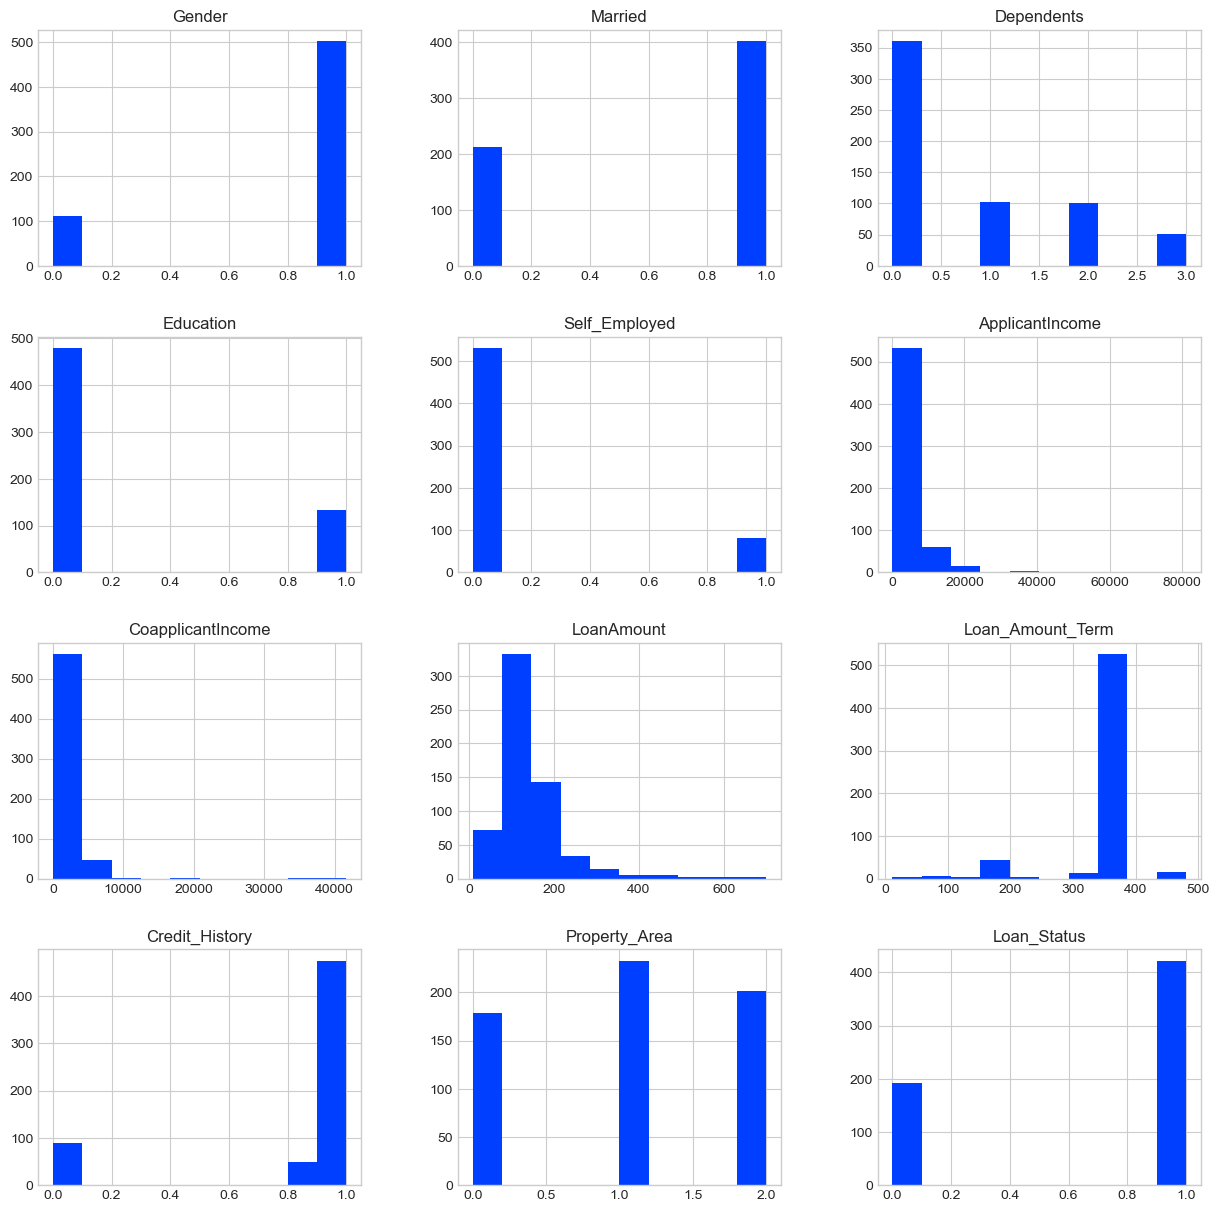

In [43]:
df.hist(figsize=(15,15))
plt.show()

# Correlation using Heatmap

<AxesSubplot:>

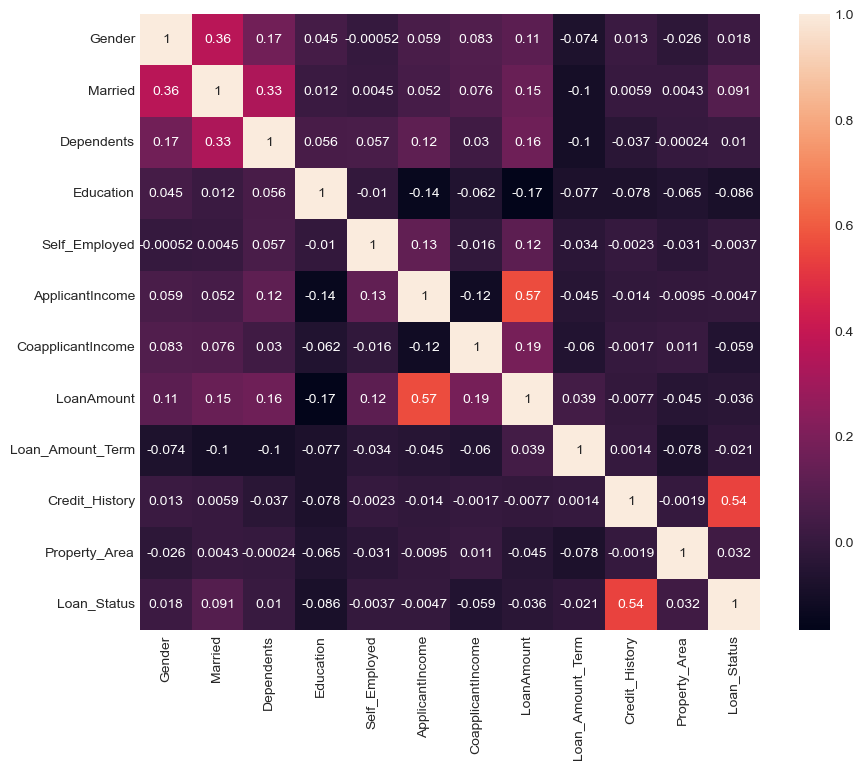

In [44]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True)

Positive correlation - A correlation of +1 indicates a perfect positive correlation, meaning that both variables move in the same direction together.

Negative correlation - A correlation of –1 indicates a perfect negative correlation, meaning that as one variable goes up, the other goes down

There is no multicoolinearity in our data...

# Correlation Bar Plot comparing features with our label

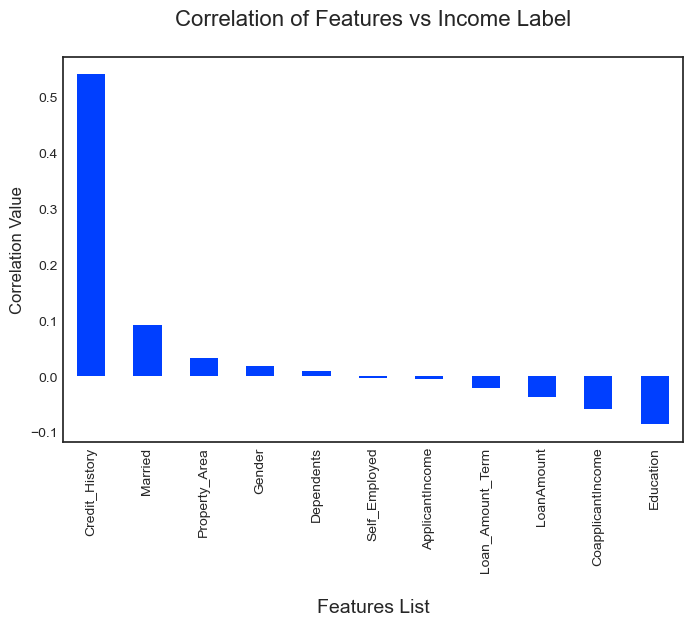

In [45]:
plt.style.use('seaborn-white')
df_corr = df.corr()
plt.figure(figsize=(8,5))
df_corr['Loan_Status'].sort_values(ascending=False).drop('Loan_Status').plot.bar()
plt.title("Correlation of Features vs Income Label\n", fontsize=16)
plt.xlabel("\nFeatures List", fontsize=14)
plt.ylabel("Correlation Value", fontsize=12)
plt.show()

Since the heatmap was not able to give us a clear picture on positive and negative correlation columns we have generated this bar plot and we see that columns loan amount term, loan amount, co applicant income and education are negatively correlated while all the remaining feature columns are positively correlated with our label column.

# Using Z score to remove the outliers:

In [46]:
z = np.abs(zscore(df))
threshold = 3
df1 = df[(z<3).all(axis = 1)]

print ("Shape of the dataframe before removing outliers: ", df.shape)
print ("Shape of the dataframe after removing outliers: ", df1.shape)
print ("Percentage of data loss post outlier removal: ", (df.shape[0]-df1.shape[0])/df.shape[0]*100)

df=df1.copy() # reassigning the changed dataframe name to our original dataframe name

Shape of the dataframe before removing outliers:  (614, 12)
Shape of the dataframe after removing outliers:  (577, 12)
Percentage of data loss post outlier removal:  6.026058631921824


I have used the Z score method to remove the outliers and the percent of data lost is 6.026058631921824 which is below 10 percent that we could have afforded to lose.

In [47]:
df.skew()

Gender              -1.622920
Married             -0.630211
Dependents           1.052106
Education            1.306588
Self_Employed        2.252848
ApplicantIncome      2.148522
CoapplicantIncome    1.350517
LoanAmount           1.113132
Loan_Amount_Term    -2.077031
Credit_History      -1.921860
Property_Area       -0.055332
Loan_Status         -0.822635
dtype: float64

dataset having the skewness so need to fix it 

Going to use log transform method to fix the skewness

# Log Transform:

In [48]:
for col in number_datatype:
    if df.skew().loc[col]>0.55:
        df[col]=np.log1p(df[col])

I have applied Log Transformation on our numerical datatype columns to ensure that we do not have skewness in our dataset

In [49]:
df.skew()

Gender              -1.622920
Married             -0.630211
Dependents           1.052106
Education            1.306588
Self_Employed        2.252848
ApplicantIncome     -0.204913
CoapplicantIncome   -0.216757
LoanAmount          -0.697883
Loan_Amount_Term    -2.077031
Credit_History      -1.921860
Property_Area       -0.055332
Loan_Status         -0.822635
dtype: float64

We have managed to reduce the skewness from our numerical columns which can be seen above while we have ignored the skewness and outlier details for our categorical columns.

# Splitting the dataset into two varriable namely "X" and "Y" for feature and label:

In [50]:
X=df.drop("Loan_Status",axis=1)
Y=df["Loan_Status"]

In [51]:
X

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1.0,0.0,0.0,0.0,0.0,8.674197,0.000000,4.993232,360.0,1.0,2.0
1,1.0,1.0,1.0,0.0,0.0,8.430327,7.319202,4.859812,360.0,1.0,0.0
2,1.0,1.0,0.0,0.0,1.0,8.006701,0.000000,4.204693,360.0,1.0,2.0
3,1.0,1.0,0.0,1.0,0.0,7.857094,7.765993,4.795791,360.0,1.0,2.0
4,1.0,0.0,0.0,0.0,0.0,8.699681,0.000000,4.955827,360.0,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...
609,0.0,0.0,0.0,0.0,0.0,7.972811,0.000000,4.276666,360.0,1.0,0.0
610,1.0,1.0,3.0,0.0,0.0,8.320448,0.000000,3.713572,180.0,1.0,0.0
611,1.0,1.0,1.0,0.0,0.0,8.996280,5.484797,5.537334,360.0,1.0,2.0
612,1.0,1.0,2.0,0.0,0.0,8.933796,0.000000,5.236442,360.0,1.0,2.0


In [52]:
Y

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 577, dtype: int32

# Resolving the class imbalance issue in our dataset:

In [53]:
Y.value_counts()

1    398
0    179
Name: Loan_Status, dtype: int64

This is showing that there is class imbalanced issue in our data;

In [54]:
# adding samples to make all the categorical label values same

oversample = SMOTE()
X, Y = oversample.fit_resample(X, Y)

SMOTE is the over sampling mechanism that we are using to ensure that all the categories present in our target label have the same value

In [55]:
Y.value_counts()

1    398
0    398
Name: Loan_Status, dtype: int64

Now our data is balanced:

# Feature Scaling:

In [56]:
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X.head()


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0.470125,-1.359891,-0.732156,-0.554524,-0.393640,0.717725,-1.069731,0.355930,0.225218,0.596059,1.224495
1,0.470125,0.767848,0.287496,-0.554524,-0.393640,0.258402,0.828644,0.027782,0.225218,0.596059,-1.269575
2,0.470125,0.767848,-0.732156,-0.554524,2.753324,-0.539490,-1.069731,-1.583496,0.225218,0.596059,1.224495
3,0.470125,0.767848,-0.732156,1.902598,-0.393640,-0.821272,0.944528,-0.129681,0.225218,0.596059,1.224495
4,0.470125,-1.359891,-0.732156,-0.554524,-0.393640,0.765725,-1.069731,0.263931,0.225218,0.596059,1.224495


I am scaling my feature data to ensure that there is no issue with the data biasness over a particular column instead a standardization will occur helping us in having a uniform dataset value.

# Finding best random state for building classification Models:

In [57]:
maxAccu=0
maxRS=0

for i in range(1, 1000):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=i)
    lr=LogisticRegression()
    lr.fit(X_train, Y_train)
    pred = lr.predict(X_test)
    acc_score = (accuracy_score(Y_test, pred))*100
    
    if acc_score>maxAccu:
        maxAccu=acc_score
        maxRS=i

print("Best accuracy score is", maxAccu,"on Random State", maxRS)

Best accuracy score is 81.90954773869346 on Random State 884


# Feature Importance BarGraph:

,Importance
Features,
Credit_History,0.308
ApplicantIncome,0.163
LoanAmount,0.154
CoapplicantIncome,0.097
Property_Area,0.079
Dependents,0.055
Married,0.035
Loan_Amount_Term,0.033
Education,0.029


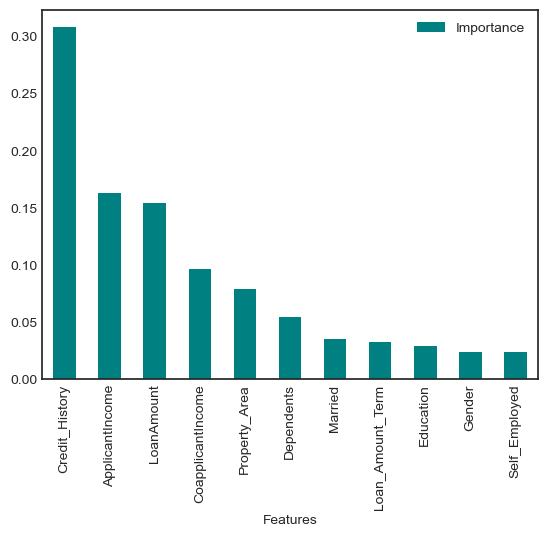

In [58]:
rf=RandomForestClassifier()
rf.fit(X_train, Y_train)
importances = pd.DataFrame({'Features':X.columns, 'Importance':np.round(rf.feature_importances_,3)})
importances = importances.sort_values('Importance', ascending=False).set_index('Features')
importances.plot.bar(color='teal')
importances

Here with the help of RandomForestClassifier we are able to list down the importance or priority given to a column as per it's involvement or weightage in predicting our label.

# Machine learning model for classification with evaluation metrics:

In [59]:
# Classification Model Function

def classify(model, X, Y):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=112)
    
    # Training the model
    model.fit(X_train, Y_train)
    
    # Predicting Y_test
    pred = model.predict(X_test)
    
    # Classification Report
    class_report = classification_report(Y_test, pred)
    print("\nClassification Report:\n", class_report)
    
    # Accuracy Score
    acc_score = (accuracy_score(Y_test, pred))*100
    print("Accuracy Score:", acc_score)
    
    # Cross Validation Score
    cv_score = (cross_val_score(model, X, Y, cv=5).mean())*100
    print("Cross Validation Score:", cv_score)
    
    # Result of accuracy minus cv scores
    result = acc_score - cv_score
    print("\nAccuracy Score - Cross Validation Score is", result)

I have defined a class that will perform the train-test split, training of machine learning model, predicting the label value, getting the accuracy score, generating the classification report, getting the cross validation score and the result of difference between the accuracy score and cross validation score for any machine learning model that calls for this function.

In [60]:
#Logistic Regression
model=LogisticRegression()
classify(model,X,Y)


Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.60      0.71        89
           1       0.74      0.93      0.82       110

    accuracy                           0.78       199
   macro avg       0.80      0.76      0.76       199
weighted avg       0.80      0.78      0.77       199

Accuracy Score: 77.88944723618091
Cross Validation Score: 72.87106918238995

Accuracy Score - Cross Validation Score is 5.018378053790968


In [61]:
# Support Vector Classifier
model=model=SVC(C=1.0, kernel='rbf', gamma='auto', random_state=42)
classify(model, X, Y)


Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.65      0.71        89
           1       0.75      0.85      0.79       110

    accuracy                           0.76       199
   macro avg       0.76      0.75      0.75       199
weighted avg       0.76      0.76      0.76       199

Accuracy Score: 75.87939698492463
Cross Validation Score: 73.24449685534591

Accuracy Score - Cross Validation Score is 2.6349001295787104


In [62]:
# Decision Tree Classifier
model=DecisionTreeClassifier(random_state=22,max_depth=15)
classify(model,X,Y)


Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.78      0.74        89
           1       0.80      0.75      0.77       110

    accuracy                           0.76       199
   macro avg       0.76      0.76      0.76       199
weighted avg       0.76      0.76      0.76       199

Accuracy Score: 75.87939698492463
Cross Validation Score: 78.01808176100629

Accuracy Score - Cross Validation Score is -2.1386847760816607


In [63]:
# Random Forest Classifier

model=RandomForestClassifier(max_depth=15,random_state=110)
classify(model,X,Y)


Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.79      0.84        89
           1       0.84      0.93      0.88       110

    accuracy                           0.86       199
   macro avg       0.87      0.86      0.86       199
weighted avg       0.87      0.86      0.86       199

Accuracy Score: 86.4321608040201
Cross Validation Score: 83.8058176100629

Accuracy Score - Cross Validation Score is 2.6263431939571973


In [64]:
# KNeighbors Classifiers
model=KNeighborsClassifier(n_neighbors=16)
classify(model,X,Y)


Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.75      0.74        89
           1       0.80      0.78      0.79       110

    accuracy                           0.77       199
   macro avg       0.77      0.77      0.77       199
weighted avg       0.77      0.77      0.77       199

Accuracy Score: 76.88442211055276
Cross Validation Score: 72.61556603773586

Accuracy Score - Cross Validation Score is 4.268856072816902


In [65]:
#Extra Trees Classifiers
model=ExtraTreesClassifier()
classify(model,X,Y)


Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.83      0.84        89
           1       0.87      0.88      0.87       110

    accuracy                           0.86       199
   macro avg       0.86      0.86      0.86       199
weighted avg       0.86      0.86      0.86       199

Accuracy Score: 85.92964824120602
Cross Validation Score: 85.55974842767296

Accuracy Score - Cross Validation Score is 0.3698998135330669


# Hyperparameter Tunning with the Best Classification Model:

In [66]:
# Choosing RandomForestClassifier

After comparing all the classification models I have selected Random Forest Classifier as my best model considering the accuracy score (being high) with the cross validation score against it and have listed down the chosen parameters above.

In [67]:
n_estimators=[int(x) for x in np.linspace(start=10,stop=80,num=10)]
max_features=['auto','sqrt']
max_depth=[2,4]
min_samples_split=[2,5]
min_samples_leaf=[1,2]
bootstrap=[True,False]

In [68]:
param_grid={'n_estimators':n_estimators,
           'max_features':max_features,
           'max_depth':max_depth,
           'min_samples_split':min_samples_split,
           'min_samples_leaf':min_samples_leaf,
           'bootstrap':bootstrap}
print(param_grid)

{'n_estimators': [10, 17, 25, 33, 41, 48, 56, 64, 72, 80], 'max_features': ['auto', 'sqrt'], 'max_depth': [2, 4], 'min_samples_split': [2, 5], 'min_samples_leaf': [1, 2], 'bootstrap': [True, False]}


In [69]:
rf_model=RandomForestClassifier()

In [70]:
rf_Grid=GridSearchCV(estimator=rf_model,param_grid=param_grid,cv=3,verbose=2,n_jobs=4)

In [71]:
rf_Grid.fit(X_train,Y_train)

Fitting 3 folds for each of 320 candidates, totalling 960 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=4,
             param_grid={'bootstrap': [True, False], 'max_depth': [2, 4],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [10, 17, 25, 33, 41, 48, 56, 64, 72,
                                          80]},
             verbose=2)

In [72]:
rf_Grid.best_params_

{'bootstrap': True,
 'max_depth': 4,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 80}

In [73]:
Final_Model=RandomForestClassifier(bootstrap='True',max_depth=4,max_features='sqrt',min_samples_leaf=2,min_samples_split=2,n_estimators=17)

In [74]:
Classifier=Final_Model.fit(X_train,Y_train)
fmod_pred=Final_Model.predict(X_test)
fmod_acc=(accuracy_score(Y_test,fmod_pred))*100
print("Accuracy Score For The Best Model is:",fmod_acc)

Accuracy Score For The Best Model is: 77.88944723618091


# AOC ROC Curve:

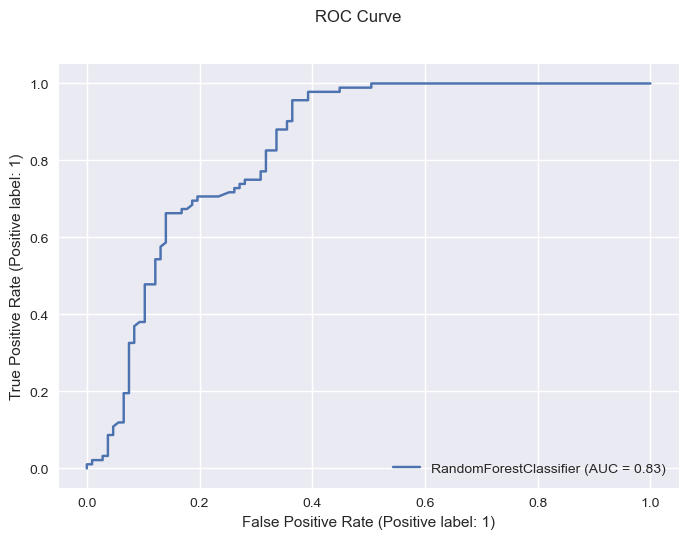

In [76]:
# plt.style.use('seaborn')
disp = metrics.plot_roc_curve(Final_Model, X_test, Y_test)
disp.figure_.suptitle("ROC Curve")
plt.show()

Generated The ROC curve for the Final Model and it is showing the AUC score for my final Model and that is 83%.

# Saving The Model.

In [77]:
import joblib
filename='FinalModel_loan.pkl'
joblib.dump(Final_Model,filename)

['FinalModel_loan.pkl']

# END OF PROJECT